# Wind turbine project portion

- Your analysis here
  
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Read in the csv file
wind_turbine_df = pd.read_csv('Resources/wind_turbine.csv')
state_population_df = pd.read_csv('Resources/wind_turbine.csv')
wind_turbine_df.head()



,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_rsa,t_ttlh,retrofit,retrofit_year,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
0,3123233,40-097764,2021-WTW-7887-OE,NaN,NaN,OK,Ellis County,40045,25 Mile Creek,2022.0,...,17671.46,180.0,0,NaN,1,3,1/4/2023,Digital Globe,-99.775963,36.458096
1,3123609,40-097526,2021-WTW-7898-OE,NaN,NaN,OK,Ellis County,40045,25 Mile Creek,2022.0,...,17671.46,180.0,0,NaN,1,3,1/4/2023,Digital Globe,-99.751343,36.446674
2,3119868,40-097497,2021-WTW-7912-OE,NaN,NaN,OK,Ellis County,40045,25 Mile Creek,2022.0,...,17671.46,180.0,0,NaN,1,3,1/4/2023,Digital Globe,-99.735718,36.423359
3,3123202,40-097556,2021-WTW-7875-OE,NaN,NaN,OK,Ellis County,40045,25 Mile Creek,2022.0,...,17671.46,180.0,0,NaN,1,3,1/4/2023,Digital Globe,-99.782372,36.484463
4,3124077,40-097543,2021-WTW-7885-OE,NaN,NaN,OK,Ellis County,40045,25 Mile Creek,2022.0,...,17671.46,180.0,0,NaN,1,3,1/4/2023,Digital Globe,-99.782089,36.473541


In [3]:


wind_turbine_clean_df = wind_turbine_df[['case_id', 't_state', 'p_name', 'p_year', 'p_tnum', 't_manu', 't_model', 't_cap', 
                                        't_hh', 't_rd', 't_ttlh', 't_conf_atr', 't_conf_loc', 'xlong', 'ylat']]
wind_turbine_clean_df = wind_turbine_clean_df.rename(columns={'case_id':'Turbine ID', 't_state':'State','p_name':'Project Name',
                                                             'p_tnum':'Turbines in Project','t_manu':'Manufacturer',
                                                              't_model':'Model Number','t_cap':'Capacity',
                                                              'p_year':'Year','t_hh':'Height','t_rd':'Rotor Diameter',
                                                              't_ttlh':'Total Height','xlong':'Longitude','ylat':'Latitude'
                                                              })
wind_turbine_clean_df



,Turbine ID,State,Project Name,Year,Turbines in Project,Manufacturer,Model Number,Capacity,Height,Rotor Diameter,Total Height,t_conf_atr,t_conf_loc,Longitude,Latitude
0,3123233,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.775963,36.458096
1,3123609,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.751343,36.446674
2,3119868,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.735718,36.423359
3,3123202,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782372,36.484463
4,3124077,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782089,36.473541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72726,3053232,NY,unknown Wyoming County,2016.0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,3,-78.187935,42.740818
72727,3101958,TX,unknown Young County,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,-98.907600,33.149414
72728,3040944,TX,unknown Young County 1,2011.0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,3,-98.551094,33.093292
72729,3055917,CO,unknown Yuma County,2016.0,2,NaN,NaN,NaN,NaN,NaN,NaN,1,3,-102.717171,40.035072


<Axes: xlabel='State'>

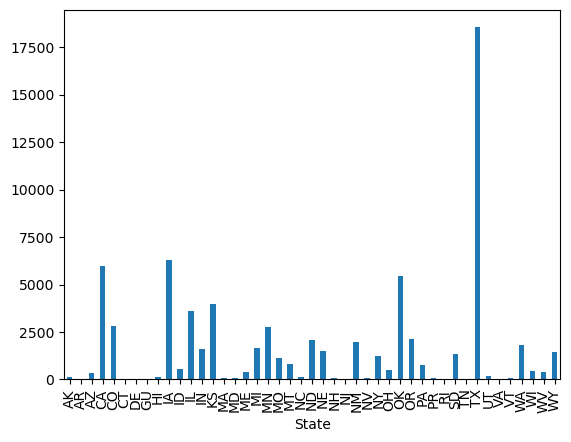

In [4]:


# location_confidence = wind_turbine_clean_df.loc[wind_turbine_clean_df['t_conf_loc'] == 3]

# attribute_confidence = wind_turbine_clean_df.loc[wind_turbine_clean_df['t_conf_atr'] == 3]


# project_max_df = wind_turbine_clean_df.loc[wind_turbine_clean_df['p_tnum'] >200] 
# project_max_df

# project_year_df = wind_turbine_clean_df.loc[wind_turbine_clean_df['p_year'] >2000]

#Show number of wind turbines by state and plot the result

# state_unique = wind_turbine_clean_df['t_state'].unique()
# state_count = len(state_unique)
# state_count

state_values = wind_turbine_clean_df.groupby(['State']).size()
state_values


state_values.plot(kind= 'bar')



In [5]:


state_capacity_average = wind_turbine_clean_df.groupby(['State'])['Capacity'].mean()
print(state_values)
state_capacity_average



State
AK      142
AR        1
AZ      321
CA     5989
CO     2835
CT        3
DE        1
GU        1
HI      129
IA     6293
ID      541
IL     3622
IN     1614
KS     3962
MA       92
MD       80
ME      417
MI     1637
MN     2744
MO     1107
MT      809
NC      105
ND     2095
NE     1523
NH       84
NJ        6
NM     1952
NV       68
NY     1233
OH      499
OK     5474
OR     2122
PA      752
PR       63
RI       35
SD     1367
TN       18
TX    18552
UT      208
VA        2
VT       73
WA     1826
WI      452
WV      419
WY     1463
dtype: int64


State
AK     556.967213
AR     100.000000
AZ    2295.880150
CA    1404.427383
CO    1835.385704
CT    1933.333333
DE    2000.000000
GU     275.000000
HI    1861.889764
IA    2018.012225
ID    1797.597043
IL    2038.112684
IN    2144.371108
KS    2097.866599
MA    1360.652174
MD    2388.125000
ME    2469.711538
MI    2082.773109
MN    1747.830991
MO    2211.239593
MT    1863.753149
NC    2000.000000
ND    2042.416107
NE    2322.070365
NH    2549.404762
NJ    1500.000000
NM    2235.042373
NV    2300.000000
NY    1849.375527
OH    2239.716024
OK    2267.016037
OR    1905.728477
PA    1942.743009
PR    2031.048387
RI    2268.142857
SD    2380.613414
TN    1610.000000
TX    2193.483942
UT    1905.731707
VA    6000.000000
VT    2055.479452
WA    1863.803513
WI    1634.155556
WV    2045.346062
WY    2272.110294
Name: Capacity, dtype: float64

In [6]:


#Clean out data with NaN values for capacity:

wind_capacity_cleaned_df = wind_turbine_clean_df.dropna(subset=['Capacity'])
wind_capacity_cleaned_df

,Turbine ID,State,Project Name,Year,Turbines in Project,Manufacturer,Model Number,Capacity,Height,Rotor Diameter,Total Height,t_conf_atr,t_conf_loc,Longitude,Latitude
0,3123233,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.775963,36.458096
1,3123609,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.751343,36.446674
2,3119868,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.735718,36.423359
3,3123202,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782372,36.484463
4,3124077,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782089,36.473541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71245,3003325,AK,unknown Kotzebue Wind Project,2003.0,15,Seaforth,AOC15/65,65.0,30.5,15.0,38.0,1,3,-162.557327,66.834328
71518,3109704,CA,unknown Riverside County,2020.0,9,Vestas,V-112,3450.0,91.5,112.0,147.5,1,3,-116.557755,33.891106
71520,3110036,CA,unknown Riverside County,2020.0,9,Vestas,V-117,3600.0,91.5,117.0,150.0,1,3,-116.552597,33.890198
71523,3110328,CA,unknown Riverside County,2020.0,9,Vestas,V-117,3600.0,91.5,117.0,150.0,1,3,-116.552635,33.891678


In [7]:
# Clean out the data with NaN values for height:

wind_height_cleaned_df = wind_turbine_clean_df.dropna(subset=['Height'])
wind_height_cleaned_df

,Turbine ID,State,Project Name,Year,Turbines in Project,Manufacturer,Model Number,Capacity,Height,Rotor Diameter,Total Height,t_conf_atr,t_conf_loc,Longitude,Latitude
0,3123233,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.775963,36.458096
1,3123609,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.751343,36.446674
2,3119868,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.735718,36.423359
3,3123202,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782372,36.484463
4,3124077,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782089,36.473541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71245,3003325,AK,unknown Kotzebue Wind Project,2003.0,15,Seaforth,AOC15/65,65.0,30.5,15.0,38.0,1,3,-162.557327,66.834328
71518,3109704,CA,unknown Riverside County,2020.0,9,Vestas,V-112,3450.0,91.5,112.0,147.5,1,3,-116.557755,33.891106
71520,3110036,CA,unknown Riverside County,2020.0,9,Vestas,V-117,3600.0,91.5,117.0,150.0,1,3,-116.552597,33.890198
71523,3110328,CA,unknown Riverside County,2020.0,9,Vestas,V-117,3600.0,91.5,117.0,150.0,1,3,-116.552635,33.891678


In [8]:
# Clean out the data with NaN values for height:

wind_all_cleaned_df = wind_turbine_clean_df.dropna()
wind_all_cleaned_df

,Turbine ID,State,Project Name,Year,Turbines in Project,Manufacturer,Model Number,Capacity,Height,Rotor Diameter,Total Height,t_conf_atr,t_conf_loc,Longitude,Latitude
0,3123233,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.775963,36.458096
1,3123609,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.751343,36.446674
2,3119868,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.735718,36.423359
3,3123202,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782372,36.484463
4,3124077,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782089,36.473541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71244,3001855,AK,unknown Kotzebue Wind Project,2003.0,15,Seaforth,AOC15/65,65.0,30.5,15.0,38.0,1,3,-162.551575,66.837898
71245,3003325,AK,unknown Kotzebue Wind Project,2003.0,15,Seaforth,AOC15/65,65.0,30.5,15.0,38.0,1,3,-162.557327,66.834328
71518,3109704,CA,unknown Riverside County,2020.0,9,Vestas,V-112,3450.0,91.5,112.0,147.5,1,3,-116.557755,33.891106
71520,3110036,CA,unknown Riverside County,2020.0,9,Vestas,V-117,3600.0,91.5,117.0,150.0,1,3,-116.552597,33.890198


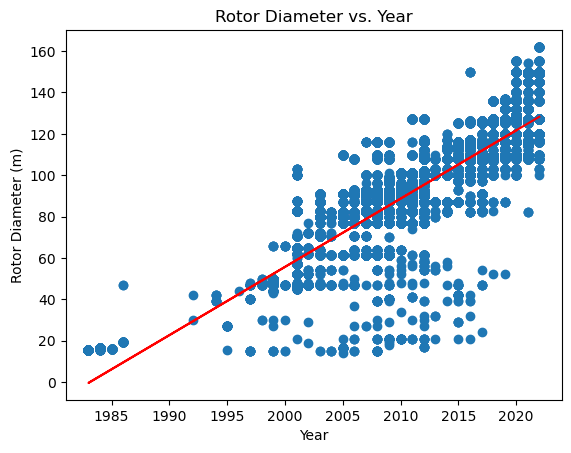

The trend from wind turbines across the United States indicates that average rotor diameter is increasing by 3.2993833092656755 meters each year.


In [9]:
from scipy.stats import linregress

x_axis = wind_all_cleaned_df['Year']
y_axis = wind_all_cleaned_df['Rotor Diameter']

plt.scatter(x_axis, y_axis)
plt.xlabel("Year")  # add X-axis label
plt.ylabel("Rotor Diameter (m)")  # add Y-axis label
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
plt.plot(x_axis,regress_values,"r-")
plt.title("Rotor Diameter vs. Year") 
plt.show()

print(f"The trend from wind turbines across the United States indicates that average rotor diameter is increasing by {slope} meters each year.")


In [10]:
gewind_turbines = wind_capacity_cleaned_df.loc[wind_capacity_cleaned_df['Manufacturer'] == 'GE Wind', "Capacity"] 
print(f"GE Wind Average Capacity: {gewind_turbines.mean()}")


vestas_turbines = wind_capacity_cleaned_df.loc[wind_capacity_cleaned_df['Manufacturer'] == 'Vestas', "Capacity"] 
print(f"Vestas Average Capacity: {vestas_turbines.mean()}")

siemens_turbines = wind_capacity_cleaned_df.loc[wind_capacity_cleaned_df['Manufacturer'] == 'Siemens', "Capacity"] 
print(f"Siemens Average Capacity: {siemens_turbines.mean()}")

gamesa_turbines = wind_capacity_cleaned_df.loc[wind_capacity_cleaned_df['Manufacturer'] == 'Gamesa', "Capacity"] 
print(f"Gamesa Average Capacity: {gamesa_turbines.mean()}")

mitsubishi_turbines = wind_capacity_cleaned_df.loc[wind_capacity_cleaned_df['Manufacturer'] == 'Mitsubishi', "Capacity"] 
print(f"Mitsubishi Average Capacity: {mitsubishi_turbines.mean()}")


GE Wind Average Capacity: 1988.684161634928
Vestas Average Capacity: 2159.6541576831187
Siemens Average Capacity: 2340.227255129694
Gamesa Average Capacity: 1855.1168916694105
Mitsubishi Average Capacity: 1326.337968815845


In [ ]:
#volume = merged_df.loc[(merged_df['Drug Regimen'] == treatment), "Tumor Volume (mm3)"]

#gewind_turbines = wind_capacity_cleaned_df.loc[(wind_capacity_cleaned_df["Manufacturer"] == GE Wind), "Capacity"]
#gewind_turbines
#gewind_averagecapacity = gewind_turbines.groupby(['Capacity']).mean
#gewind_averagecapacity

average_capacity = [1989, 2160, 2340, 1855, 1326]
lifespan = [2, 8, 70, 1.5, 25]
index = ['GE Wind', 'Vestas', 'Siemens',
         'Gamesa', 'Mitsubishi']

df = pd.DataFrame({'average capacity': average_capacity,

                   'lifespan': lifespan}, index=index)

ax = df.plot.bar(rot=0)